In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the file
df = pd.read_csv('section_2.csv')

In [3]:
df.shape

(500, 1294)

In [4]:
df.head()

,labelML,000,101,102,12,13,16,17,18,19,...,woollen,work,world,wors,would,written,xbox,yarn,year,àr
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
target = df.labelML
x = df.drop('labelML', axis = 1)

In [6]:
from sklearn.feature_extraction.text import TfidfTransformer

In [7]:
tfidf = TfidfTransformer()
tfidf.fit(x)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [8]:
tfidf_df = pd.DataFrame(tfidf.transform(x).todense(), columns=x.columns)

## Splitting

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
trainx, testx, trainy, testy = train_test_split(tfidf_df, target, test_size = 0.2, random_state = 123)

In [11]:
trainxc, testxc, trainyc, testyc = train_test_split(x, target, test_size = 0.2, random_state = 123)

## Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [13]:
gnb = GaussianNB()
gnb.fit(trainx, trainy)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
print(classification_report(trainy, gnb.predict(trainx)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       305
           1       0.99      1.00      0.99        95

    accuracy                           1.00       400
   macro avg       0.99      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [15]:
print(classification_report(testy, gnb.predict(testx)))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93        69
           1       0.96      0.71      0.81        31

    accuracy                           0.90       100
   macro avg       0.92      0.85      0.87       100
weighted avg       0.91      0.90      0.90       100



In [16]:
#confusin matrix for train
confusion_matrix(trainy, gnb.predict(trainx))

array([[304,   1],
       [  0,  95]], dtype=int64)

In [17]:
#confusion matric for test
confusion_matrix(testy, gnb.predict(testx))

array([[68,  1],
       [ 9, 22]], dtype=int64)

In [18]:
#plotting learning curves
from mlxtend.plotting import plot_learning_curves

([1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9941520467836257,
  0.9947643979057591],
 [0.631578947368421,
  0.7547169811320754,
  0.7547169811320754,
  0.7777777777777777,
  0.7547169811320754,
  0.7547169811320754,
  0.8148148148148149,
  0.8363636363636364,
  0.8148148148148149,
  0.8148148148148149])

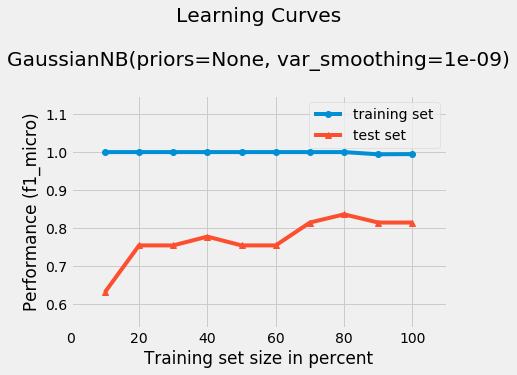

In [19]:
plot_learning_curves(trainx, trainy, testx, testy, gnb, scoring='f1_micro')

## ROC Curve

In [20]:
from sklearn.metrics import roc_curve

In [21]:
fpr, tpr, thresholds = roc_curve(trainy, gnb.predict_proba(trainx)[:,1])

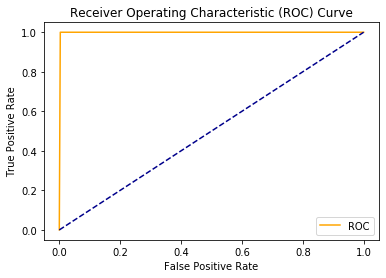

In [22]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Using Count Matrix

In [23]:
gnb.fit(trainxc, trainyc)

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
print(classification_report(trainyc, gnb.predict(trainxc)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       305
           1       0.99      1.00      0.99        95

    accuracy                           1.00       400
   macro avg       0.99      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [25]:
print(classification_report(testyc, gnb.predict(testxc)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94        69
           1       0.96      0.74      0.84        31

    accuracy                           0.91       100
   macro avg       0.93      0.86      0.89       100
weighted avg       0.91      0.91      0.91       100



([1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9941520467836257,
  0.9947643979057591],
 [0.7419354838709677,
  0.7547169811320754,
  0.8214285714285714,
  0.8214285714285714,
  0.7999999999999999,
  0.7999999999999999,
  0.8571428571428571,
  0.8571428571428571,
  0.8363636363636364,
  0.8363636363636364])

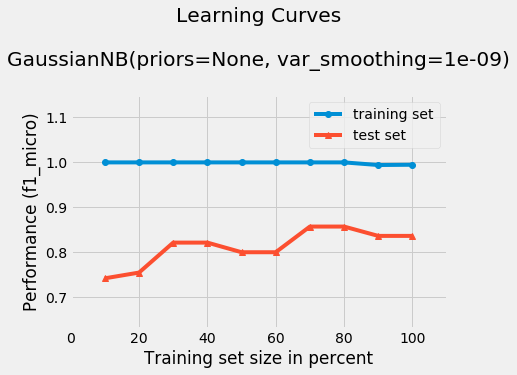

In [26]:
plot_learning_curves(trainxc, trainyc, testxc, testyc, gnb, scoring='f1_micro')

### ROC Curve

In [27]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(trainy, gnb.predict_proba(trainx)[:,1])
auc

0.9983606557377049

In [28]:
fpr, tpr, thresholds = roc_curve(trainy, gnb.predict_proba(trainx)[:,1])

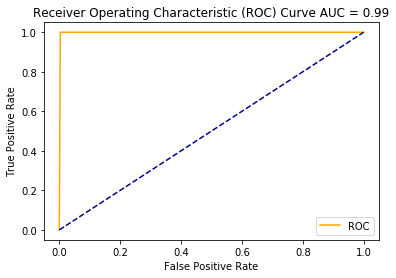

In [29]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve AUC = {}'.format(str(auc)[:4]))
plt.legend()
plt.show()

## SVM

In [30]:
from sklearn.svm import SVC

In [31]:
paramters = {'kernel':['rbf', 'poly', 'linear'], 'degree':[3,4,5], }
svc = GridSearchCV(SVC(class_weight = 'balanced', random_state = 123), 
                   param_grid=paramters, cv = 5, n_jobs=-1, scoring='f1_micro')
svc.fit(trainx, trainy)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=123, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'degree': [3, 4, 5],
                         'kernel': ['rbf', 'poly', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_micro', verbose=0)

In [32]:
svc.best_estimator_

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=123,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
svc.best_params_

{'degree': 3, 'kernel': 'linear'}

In [34]:
print(classification_report(trainy, svc.best_estimator_.predict(trainx)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       305
           1       0.88      1.00      0.94        95

    accuracy                           0.97       400
   macro avg       0.94      0.98      0.96       400
weighted avg       0.97      0.97      0.97       400



In [35]:
print(classification_report(testy, svc.best_estimator_.predict(testx)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        69
           1       0.93      0.87      0.90        31

    accuracy                           0.94       100
   macro avg       0.94      0.92      0.93       100
weighted avg       0.94      0.94      0.94       100



([1.0,
  0.9500000000000001,
  0.9523809523809523,
  0.9411764705882353,
  0.9333333333333333,
  0.9402985074626865,
  0.9350649350649352,
  0.9580838323353293,
  0.9239130434782609,
  0.9359605911330049],
 [0.72,
  0.8148148148148149,
  0.8571428571428571,
  0.8813559322033899,
  0.9180327868852459,
  0.9,
  0.9180327868852459,
  0.9180327868852459,
  0.9,
  0.9])

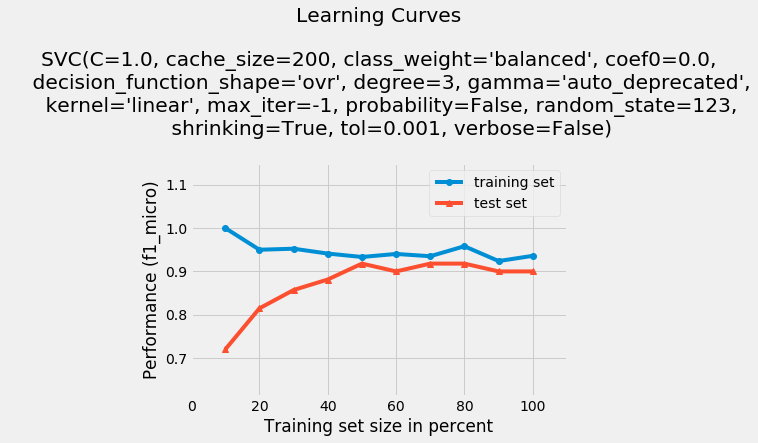

In [36]:
plot_learning_curves(trainx, trainy, testx, testy, svc.best_estimator_, scoring='f1_micro')

### Count Matrix

In [37]:
paramters = {'kernel':['rbf', 'poly', 'linear'], 'degree':[3,4,5]}
svc = GridSearchCV(SVC(class_weight = 'balanced', random_state = 123), 
                   param_grid=paramters, cv = 5, n_jobs=-1, scoring='f1_micro')
svc.fit(trainxc, trainyc)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=123, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'degree': [3, 4, 5],
                         'kernel': ['rbf', 'poly', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_micro', verbose=0)

In [38]:
svc.best_estimator_

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=123,
    shrinking=True, tol=0.001, verbose=False)

In [39]:
svc.best_params_

{'degree': 3, 'kernel': 'linear'}

In [40]:
print(classification_report(trainyc, svc.best_estimator_.predict(trainxc)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       305
           1       1.00      1.00      1.00        95

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [41]:
print(classification_report(testyc, svc.best_estimator_.predict(testxc)))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        69
           1       0.86      0.77      0.81        31

    accuracy                           0.89       100
   macro avg       0.88      0.86      0.87       100
weighted avg       0.89      0.89      0.89       100



([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.7924528301886793,
  0.7547169811320754,
  0.8214285714285714,
  0.8275862068965517,
  0.8333333333333334,
  0.8474576271186439,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8135593220338982])

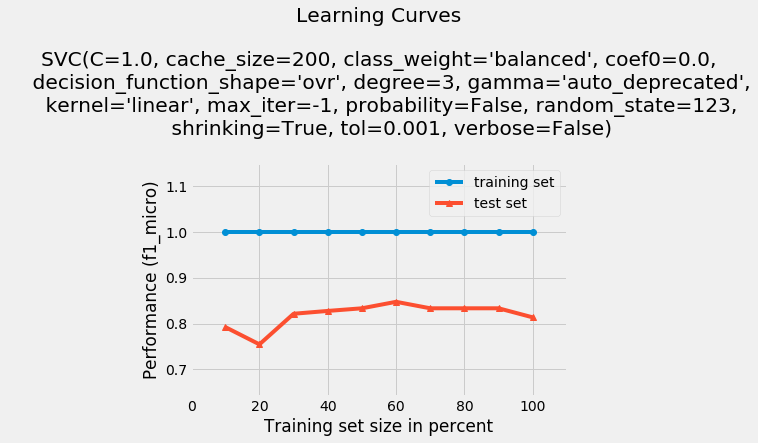

In [42]:
plot_learning_curves(trainxc, trainyc, testxc, testyc, svc.best_estimator_, scoring='f1_micro')

## Logistic Regresssion

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
parameters = {'penalty':['l1', 'l2'], 'l1_ratio':np.arange(0,1,0.05)}
logit = GridSearchCV(LogisticRegression(random_state=123, class_weight='balanced'), 
                     param_grid=parameters,cv = 5, n_jobs=-1)

In [45]:
logit.fit(trainx, trainy)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=123, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [46]:
print(classification_report(trainy, logit.best_estimator_.predict(trainx)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       305
           1       0.88      0.99      0.93        95

    accuracy                           0.96       400
   macro avg       0.94      0.97      0.95       400
weighted avg       0.97      0.96      0.97       400



In [47]:
print(classification_report(testy, logit.best_estimator_.predict(testx)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        69
           1       0.93      0.87      0.90        31

    accuracy                           0.94       100
   macro avg       0.94      0.92      0.93       100
weighted avg       0.94      0.94      0.94       100



([0.9473684210526316,
  0.9500000000000001,
  0.9375,
  0.9411764705882353,
  0.9423076923076923,
  0.9323308270676691,
  0.9342105263157895,
  0.9411764705882353,
  0.9340659340659341,
  0.9306930693069306],
 [0.7450980392156863,
  0.8571428571428571,
  0.8571428571428571,
  0.8620689655172414,
  0.9,
  0.9180327868852459,
  0.9180327868852459,
  0.9,
  0.9,
  0.9])

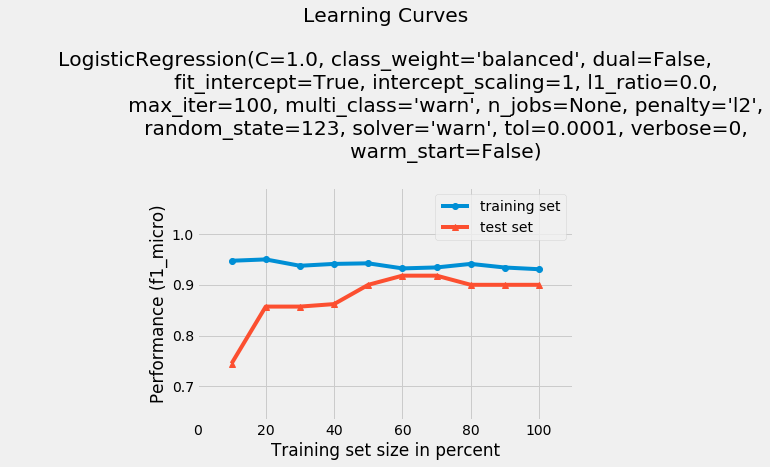

In [48]:
plot_learning_curves(trainx, trainy, testx, testy, logit.best_estimator_, scoring='f1_micro')

In [49]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(trainy, logit.predict_proba(trainx)[:,1])
auc

0.9906471095772218

In [50]:
fpr, tpr, thresholds = roc_curve(trainy, logit.best_estimator_.predict_proba(trainx)[:,1])

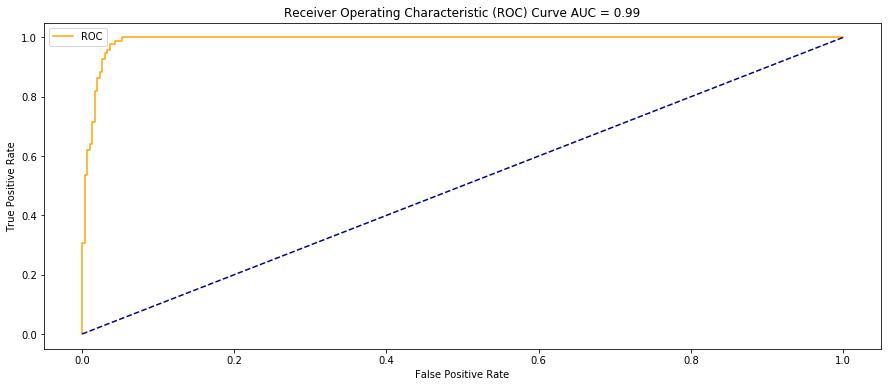

In [51]:
plt.figure(figsize  = (15,6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve AUC = {}'.format(str(auc)[:4]))
plt.legend()
plt.show()

### Count Matrix

In [52]:
parameters = {'penalty':['l1', 'l2'], 'l1_ratio':np.arange(0,1,0.05)}
logit = GridSearchCV(LogisticRegression(random_state=123, class_weight='balanced'), 
                     param_grid=parameters,cv = 5, n_jobs=-1)

In [53]:
logit.fit(trainxc, trainyc)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=123, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [54]:
print(classification_report(trainyc, logit.best_estimator_.predict(trainxc)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       305
           1       0.94      1.00      0.97        95

    accuracy                           0.98       400
   macro avg       0.97      0.99      0.98       400
weighted avg       0.99      0.98      0.99       400



In [55]:
print(classification_report(testyc, logit.best_estimator_.predict(testxc)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        69
           1       0.90      0.87      0.89        31

    accuracy                           0.93       100
   macro avg       0.92      0.91      0.92       100
weighted avg       0.93      0.93      0.93       100



([0.9473684210526316,
  0.9500000000000001,
  0.9523809523809523,
  0.963855421686747,
  0.9607843137254902,
  0.9692307692307692,
  0.972972972972973,
  0.975609756097561,
  0.9714285714285714,
  0.9693877551020408],
 [0.8363636363636364,
  0.8421052631578947,
  0.8421052631578947,
  0.8813559322033899,
  0.8813559322033899,
  0.9,
  0.9,
  0.9032258064516129,
  0.8709677419354839,
  0.8852459016393444])

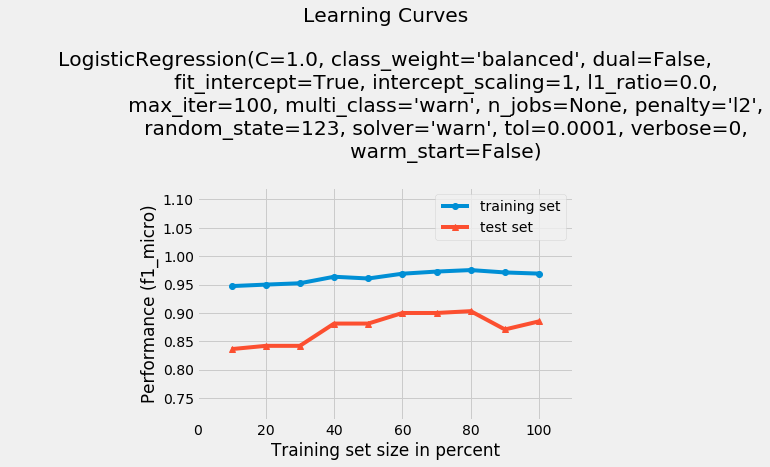

In [56]:
plot_learning_curves(trainxc, trainyc, testxc, testyc, logit.best_estimator_, scoring='f1_micro')

In [57]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(trainyc, logit.predict_proba(trainxc)[:,1])
auc

0.9999309749784296

In [58]:
fpr, tpr, thresholds = roc_curve(trainy, logit.best_estimator_.predict_proba(trainx)[:,1])

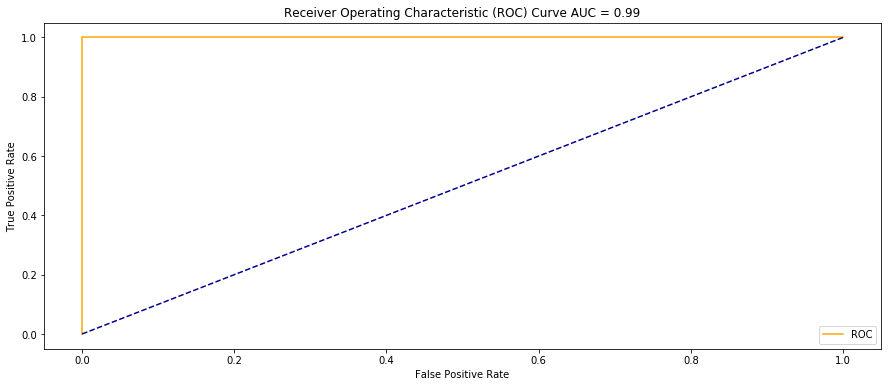

In [59]:
plt.figure(figsize  = (15,6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve AUC = {}'.format(str(auc)[:4]))
plt.legend()
plt.show()